## Dataset: https://www.kaggle.com/chaandsheikh/upper-confidence-bound-dataset

In [35]:


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('data.csv')

In [36]:
dataset

,Retailer01,Retailer02,Retailer03,Retailer04,Retailer05,Retailer06,Retailer07,Retailer08
0,3,6,1,6,7,6,1,4
1,6,5,6,10,7,5,1,1
2,3,4,8,4,5,7,4,1
3,8,10,5,4,5,9,6,4
4,1,4,9,9,9,6,7,4
...,...,...,...,...,...,...,...,...
49995,1,5,5,8,4,5,7,5
49996,9,8,2,10,8,9,8,3
49997,6,1,6,9,10,7,2,7
49998,4,6,6,1,4,2,3,10


In [37]:
# Implementing UCB
import math
N = 300
d = 8
bandit_selected = []
bandit_selection_count = [0] * d
sums_of_reward = [0] * d
total_reward = 0

for n in range(0, N):
    bandit = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (bandit_selection_count[i] > 0):
            average_reward = sums_of_reward[i] / bandit_selection_count[i]
            delta_i = math.sqrt(2 * math.log(n+1) / bandit_selection_count[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 10e50
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            bandit = i
    bandit_selected.append(bandit)
    bandit_selection_count[bandit] += 1
    reward = dataset.values[n, bandit]
    sums_of_reward[bandit] += reward
    total_reward += reward

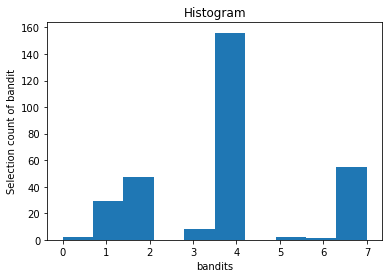

In [38]:
plt.hist(bandit_selected)
plt.title('Histogram')
plt.xlabel('bandits')
plt.ylabel('Selection count of bandit')
plt.show()